# Sentiment Analysis on Hakimi's Case

### Scraping the Data:

In [6]:
import pandas as pd
import snscrape.modules.twitter as sntwitter 
from tqdm.notebook import tqdm 


In [63]:
no_of_tweet = 100_000
hakimi = sntwitter.TwitterSearchScraper('hakimi')
tweets = []
for i, tweet in tqdm(enumerate(hakimi.get_items()), total=no_of_tweet):
    data = [
        tweet.date,
        tweet.id,
        tweet.user.username,
        tweet.rawContent,
        tweet.likeCount, 
        tweet.retweetCount,
    ]
    tweets.append(data)
    if i > no_of_tweet:
        break

tweets_df = pd.DataFrame(tweets, columns=['Date', 'Tweet ID', 'Username', 'Post', 'Likes', 'Retweets' ])
tweets_df.to_csv('tweets.csv')

### Loading the CSV

In [91]:
hk = pd.read_csv('tweets.csv', usecols=['Date', 'Tweet ID', 'Username', 'Post', 'Likes', 'Retweets'])

hk.to_csv('tweets.csv')
hk.tail(10)

,Date,Tweet ID,Username,Post,Likes,Retweets
24286,2023-04-15 08:11:35+00:00,1647150663460339714,ibrahimyusuf212,Is not has if I have not tried this #hakimi me...,0,0
24287,2023-04-15 08:11:35+00:00,1647150661912412161,Bby_gurl_bella,@_UR_VINNIE Still na he d see am pass,1,0
24288,2023-04-15 08:11:34+00:00,1647150658858938368,Kaarl911,@mistarfly @yabaleftonline Buh wetin him talk ...,14,1
24289,2023-04-15 08:11:33+00:00,1647150653377228800,Amazingrace81,@vanguardngrnews If truly Mr P said those word...,1,0
24290,2023-04-15 08:11:32+00:00,1647150652714364928,Ednah___,Hakimi 💀,0,0
24291,2023-04-15 08:11:32+00:00,1647150651682455552,Vhardy69,@kobiwaynejr 😂😂,0,0
24292,2023-04-15 08:11:31+00:00,1647150646636716032,pellymane,Good morning my fellow Hakimi men @TommyOffixi...,2,0
24293,2023-04-15 08:11:31+00:00,1647150645500338178,latestly,Achraf Hakimi's Property Registered Under Moth...,0,0
24294,2023-04-15 08:11:30+00:00,1647150644753747969,GloriaWilfred,Someone said that Hakimi is a true alpha male ☹️.,0,0
24295,2023-04-15 08:11:30+00:00,1647150642559950849,AndyjnrUmaru,"This HAKIMI matter don tire me, everybody star...",26,7


### Sentiment Analysis:


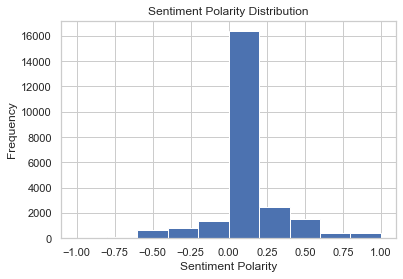

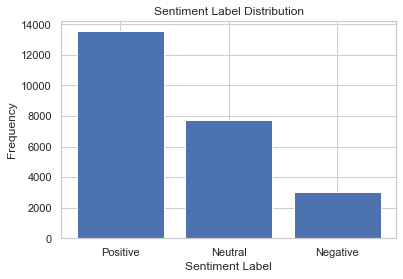

In [77]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('tweets.csv', usecols=['Date', 'Tweet ID', 'Username', 'Post', 'Likes', 'Retweets'])

# Define a function to calculate sentiment polarity using TextBlob
def get_sentiment(tweet):
    blob = TextBlob(tweet)
    return blob.sentiment.polarity

# Apply the get_sentiment function to the 'Post' column to get the sentiment polarity for each tweet
df['Sentiment'] = df['Post'].apply(get_sentiment)

# Create a new column 'Sentiment_Label' based on the sentiment polarity score
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Visualize the distribution of sentiment polarity scores
plt.hist(df['Sentiment'])
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Polarity Distribution')
plt.show()

# Visualize the distribution of sentiment labels
plt.bar(df['Sentiment_Label'].unique(), df['Sentiment_Label'].value_counts())
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Sentiment Label Distribution')
plt.show()

df.to_csv('tweets-with-sentiment.csv', index=False)



### Bar Plot


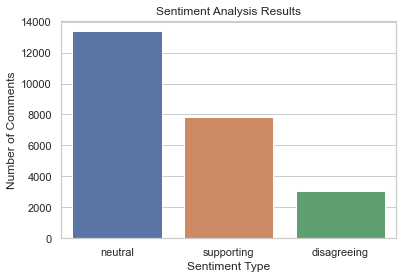

In [85]:

# Load the CSV file into a DataFrame
df = pd.read_csv("tweets.csv", usecols=['Date', 'Tweet ID', 'Username', 'Post', 'Likes', 'Retweets'])

# Define a function to clean the tweets
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

# Define a function to analyze the sentiment of a tweet using TextBlob
def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using TextBlob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Create a new column in the DataFrame to store the sentiment of each tweet
df['Sentiment'] = df['Post'].apply(analyze_sentiment)

# Create a new column in the DataFrame to store the type of sentiment of each tweet
df['Sentiment Type'] = np.where(df['Sentiment'] == 'positive', 'supporting', 
                        (np.where(df['Sentiment'] == 'negative', 'disagreeing', 'neutral')))

# Count the number of supporting, disagreeing, and neutral comments
count_sentiments = df['Sentiment Type'].value_counts()

# Plot a bar graph of the supporting, disagreeing, and neutral comments
sns.set(style="whitegrid")
ax = sns.barplot(x=count_sentiments.index, y=count_sentiments.values)
plt.title("Sentiment Analysis Results")
plt.xlabel("Sentiment Type")
plt.ylabel("Number of Comments")
plt.show()


### Pie Chart

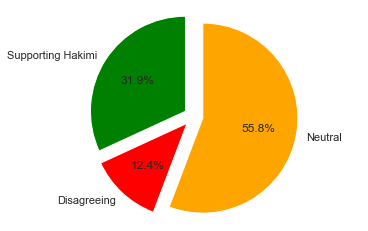

In [80]:
# load the CSV file
df = pd.read_csv('Hakimi', usecols=['Post'])

# initialize counters
support_count = 0
disagree_count = 0
neutral_count = 0

# loop through each tweet and perform sentiment analysis
for tweet in df['Post']:
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        support_count += 1
    elif analysis.sentiment.polarity < 0:
        disagree_count += 1
    else:
        neutral_count += 1

# calculate percentages
total_count = len(df)
support_percent = (support_count / total_count) * 100
disagree_percent = (disagree_count / total_count) * 100
neutral_percent = (neutral_count / total_count) * 100

# plot the results
labels = ['Supporting Hakimi', 'Disagreeing', 'Neutral']
sizes = [support_percent, disagree_percent, neutral_percent]
colors = ['green', 'red', 'orange']
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.show()
